# About
This a [tutorial](https://www.youtube.com/watch?v=rHgQrdME-DA) I found when researching about `accuracy`. It feels quite intuitive to follow

The code was picked from [here](https://github.com/bnsreenu/python_for_microscopists/blob/master/135_model_compile_metrics.py)

In [2]:
#This part of the code demonstrates classification accuracy metric in Keras
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

2023-02-28 07:55:42.369777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 07:55:42.507250: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 07:55:42.507282: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-28 07:55:43.307056: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

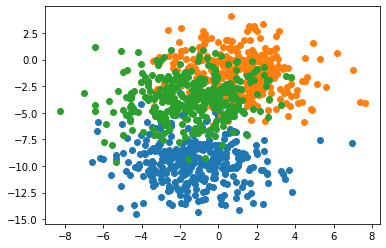

In [3]:
####################################
#Understanding the artificial generated data
#Comment this part for full code execution.
# 
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate classification dataset with 3 centers (labels/classes)
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

In [13]:
########################################
from keras.optimizers import SGD

x, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)  
# one hot encode output variable to convert from integers to binary class
y = to_categorical(y)

# create model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))  #Predict the 3 classes
    
# compile model
opt = SGD(learning_rate=0.1, momentum=0.5) #if we want to use Stochastic gradient descent as optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# train model
history = model.fit(x, y, epochs=100, batch_size=32, verbose=2)
# plot metrics

Epoch 1/100


ValueError: in user code:

    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/training.py", line 1028, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/metrics/__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/metrics/__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "/home/davif/.pyenv/versions/3.9.7/envs/thinkBayes/lib/python3.9/site-packages/keras/saving/legacy/serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: 'loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


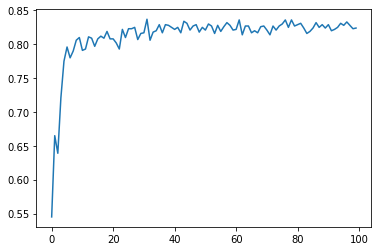

In [9]:
plt.plot(history.history['accuracy'])
plt.show()